<a href="https://colab.research.google.com/github/manendranathshukla/Linear-Regression/blob/master/DecisionTreeRegression_on_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston


In [0]:
mydata=load_boston()

In [0]:
my_data=pd.DataFrame(mydata.data)

In [12]:
print(my_data)


           0     1      2    3      4   ...    8      9     10      11     12
0     0.00632  18.0   2.31  0.0  0.538  ...   1.0  296.0  15.3  396.90   4.98
1     0.02731   0.0   7.07  0.0  0.469  ...   2.0  242.0  17.8  396.90   9.14
2     0.02729   0.0   7.07  0.0  0.469  ...   2.0  242.0  17.8  392.83   4.03
3     0.03237   0.0   2.18  0.0  0.458  ...   3.0  222.0  18.7  394.63   2.94
4     0.06905   0.0   2.18  0.0  0.458  ...   3.0  222.0  18.7  396.90   5.33
5     0.02985   0.0   2.18  0.0  0.458  ...   3.0  222.0  18.7  394.12   5.21
6     0.08829  12.5   7.87  0.0  0.524  ...   5.0  311.0  15.2  395.60  12.43
7     0.14455  12.5   7.87  0.0  0.524  ...   5.0  311.0  15.2  396.90  19.15
8     0.21124  12.5   7.87  0.0  0.524  ...   5.0  311.0  15.2  386.63  29.93
9     0.17004  12.5   7.87  0.0  0.524  ...   5.0  311.0  15.2  386.71  17.10
10    0.22489  12.5   7.87  0.0  0.524  ...   5.0  311.0  15.2  392.52  20.45
11    0.11747  12.5   7.87  0.0  0.524  ...   5.0  311.0  15.2  

In [16]:
print(my_data.shape)
print(my_data.head())


(506, 13)
        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [23]:
print(my_data.describe())
print(mydata.keys())
print(mydata.feature_names)

               0           1           2   ...          10          11          12
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534  356.674032   12.653063
std      8.601545   23.322453    6.860353  ...    2.164946   91.294864    7.141062
min      0.006320    0.000000    0.460000  ...   12.600000    0.320000    1.730000
25%      0.082045    0.000000    5.190000  ...   17.400000  375.377500    6.950000
50%      0.256510    0.000000    9.690000  ...   19.050000  391.440000   11.360000
75%      3.677083   12.500000   18.100000  ...   20.200000  396.225000   16.955000
max     88.976200  100.000000   27.740000  ...   22.000000  396.900000   37.970000

[8 rows x 13 columns]
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [24]:
print(mydata.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [31]:
mydata_cols=pd.DataFrame(mydata.data)

mydata_cols.columns=mydata.feature_names
print(mydata_cols.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [33]:
print(mydata.target.shape)
mydata_cols["PRICE"]=mydata.target
print(mydata_cols.head())

(506,)
      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


In [0]:
y=mydata.target
X=my_data

In [51]:
print(y.shape)
print(X.shape)

(506,)
(506, 13)


In [0]:
from sklearn.tree import DecisionTreeRegressor

my_model=DecisionTreeRegressor(random_state=1)


In [56]:
my_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [58]:
print(my_model.predict(X.head()))
y_pred=my_model.predict(X)

[24.  21.6 34.7 33.4 36.2]


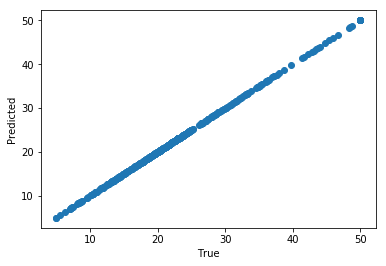

In [59]:
import matplotlib.pyplot as plt
plt.scatter(y,y_pred)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [66]:
import sklearn
mse=sklearn.metrics.mean_squared_error(y,y_pred)
print(mse)

0.0


In [0]:
from sklearn.linear_model import LinearRegression
my_linear_model=LinearRegression()


In [62]:
my_linear_model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_predicted=my_linear_model.predict(X)
print(my_linear_model.predict(X.head()))

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


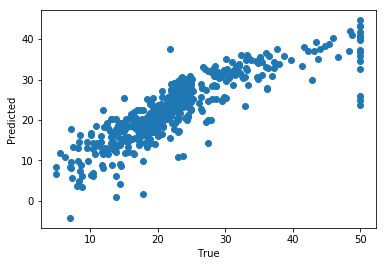

In [64]:
plt.scatter(y,y_predicted)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [68]:
import sklearn
mse=sklearn.metrics.mean_squared_error(y,y_predicted)
print(mse)

21.894831181729202
